## pip install packagename

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime 
from datetime import date
import seaborn as sns
from matplotlib import pyplot as plt

## Pull equities data from Amazon/Ford along with Bitcoin data

In [10]:
start = datetime.date.today() - datetime.timedelta(days=5*365)
end = datetime.date.today()
#start = datetime.date(2016,11,16)
#end = datetime.date(2021,11,18)
print(start, end)
df = web.DataReader(["AMZN","F","BTC-USD"],"yahoo",start, end)["Adj Close"]


2017-06-30 2022-06-29


## Taking a look at the data

In [12]:
df.head(10)
# the number shows how many lines will show up 

Symbols,AMZN,F,BTC-USD
Date,,,
2017-06-30,48.400002,9.231046,2480.840088
2017-07-01,NaN,NaN,2434.550049
2017-07-02,NaN,NaN,2506.469971
2017-07-03,47.682999,9.536276,2564.060059
2017-07-04,NaN,NaN,2601.639893
2017-07-05,48.570000,9.321790,2601.989990
2017-07-06,48.257000,9.222798,2608.560059
2017-07-07,48.938000,9.288795,2518.659912
2017-07-08,NaN,NaN,2571.340088


In [13]:
## Digging a litter deeper into the data 
df.describe()

Symbols,AMZN,F,BTC-USD
count,1258.000000,1258.000000,1826.000000
mean,113.699660,10.357783,19002.288975
std,40.727075,3.588674,17539.703923
min,46.930000,3.943265,1929.819946
25%,83.753622,8.314647,6778.917358
50%,96.819752,9.326176,9659.949707
75%,158.093746,11.802657,33740.259766
max,186.570496,24.895512,67566.828125


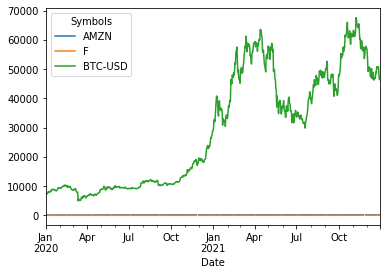

In [17]:
## Charting prices over 2020
df["2020-01-01":"2021-12-31"].plot()

In [35]:
np.round(df.tail(3),3)

Symbols,Amazon,Ford,Bitcoin
Date,,,
2022-06-27,-0.028,0.002,0.0
2022-06-28,-0.053,-0.019,0.0
2022-06-29,0.012,-0.034,0.0


In [36]:
df.join(web.DataReader(["BLV"],"yahoo",start,end)["Adj Close"])

Symbols,Amazon,Ford,Bitcoin,BLV
Date,,,,
2017-07-10,0.017933,0.007080,0.0,75.207985
2017-07-11,-0.002351,0.003521,0.0,75.338684
2017-07-12,0.012376,0.007878,0.0,75.730721
2017-07-13,-0.005859,0.011270,0.0,75.493813
2017-07-14,0.001179,0.006873,0.0,75.624519
...,...,...,...,...
2022-06-23,0.031531,0.006945,0.0,79.529999
2022-06-24,0.035128,0.038189,0.0,79.180000
2022-06-27,-0.028215,0.002495,0.0,78.320000


In [23]:
df.tail(10)

Symbols,AMZN,F,BTC-USD
Date,,,
2022-06-20,NaN,NaN,20599.537109
2022-06-21,108.680000,11.4600,20710.597656
2022-06-22,108.949997,11.4800,19987.029297
2022-06-23,112.440002,11.5600,21085.876953
2022-06-24,116.459999,12.0100,21231.656250
2022-06-25,NaN,NaN,21502.337891
2022-06-26,NaN,NaN,21027.294922
2022-06-27,113.220001,12.0400,20735.478516
2022-06-28,107.400002,11.8100,20280.634766


In [37]:
# first, we need to remove the Null for the weekend dates 
df = df.dropna()
#print(df)
df["Amazon"] = np.log(df["Amazon"] = np.log(df["AMZN"]) - np.log(df["AM(1))
 np.log(df["AMZN"].shift(1))
df["Ford"] = np.log(df.F) - np.log(df.F.shift(1))
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"])
df = df.iloc[1:,3:]

KeyError: 'AMZN'